### Useful Resources and a little background.

[Youtube Video to help with the Statistical Math behind this task.](https://www.youtube.com/watch?v=dNfpsVLaaEE)

[Values of the Normal distribution](	https://www.medcalc.org/manual/values_of_the_normal_distribution.php)


__Pct Area:__ the percentage of area (as a fraction of 1) under a Gaussian curve from -z to z. 

__z-value:__ the standard deviations. 1$\sigma$ (or z-value = 1) is equivalent to 68.27% confidence interval. 68.27% of the area is located between -1 and +1 $\sigma$, or 1 standard deviation.

| Pct Area | z-value |
|----------|---------|
| 0.999	   | 3.29053 |
| 0.998	   | 3.09023 |
| 0.9973   | 3       |
| 0.995	   | 2.80703 |
| 0.99	   | 2.57583 |
| 0.98	   | 2.32635 |
| 0.9545   | 2       |
| 0.95	   | 1.95996 |
| 0.90	   | 1.64485 |
| 0.80	   | 1.28155 |
| 0.6827   | 1       |
| 0.50	   | 0.67449 |

<img src="https://www.medcalc.org/manual/_help/images/z_curve2.png" />



[Also see table under the Quantile Function section at this Wikipedia page.](https://en.wikipedia.org/wiki/Normal_distribution#Quantile_function)

[The 68-95-99.7 Rule](
https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule)


Computing these quantiles:

    1 sigma:  68.27%
    -----------------
    50-(68.27/2.) = 15.865
    50+(68.27/2.) = 84.135

    2 sigma:  95.45%
    -----------------
    50-(95.45/2.) = 2.275
    50+(95.45/2.) = 97.725

    3 sigma:  99.73%
    -----------------
    50-(99.73/2.) = 0.135
    50+(99.73/2.) = 99.865

    90% Confidence Interval: 
    -----------------
    50-(90/2.) = 5
    50+(90/2.) = 95

    

__These percentages and z-values are true for any Gaussian distribution, regardless of its mean and standard deviation values.__ 


```


```


In [1]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#   ****   AS A PERCENTAGE    ****
sig1_L, sig1_U       = 50-(68.27/2.), 50+(68.27/2.)
sig2_L, sig2_U       = 50-(95.45/2.), 50+(95.45/2.)
sig3_L, sig3_U       = 50-(99.73/2.), 50+(99.73/2.)
CI90pct_L, CI90pct_U = 50-(90/2.), 50+(90/2.)



#   ****    AS A FRACTION    ****
sig1_L, sig1_U       = .50-(.6827/2.), .50+(.6827/2.)
sig2_L, sig2_U       = .50-(.9545/2.), .50+(.9545/2.)
sig3_L, sig3_U       = .50-(.9973/2.), .50+(.9973/2.)
CI90pct_L, CI90pct_U = .50-(.90/2.), .50+(.90/2.)

In [3]:
def get_sigma(err, z, n):
    '''
    Parameters
    ----------
    err: the errorbar on the mean. MUST BE THE MARGIN OF ERROR, NOT THE CONFIDENCE
         INTERVAL BOUNDARIES. 
         Ex:
            If the published value is 95+-2, then 2 is the margin of error and
            should be used for this parameter. 
            The Confidence Interval would be either 93 or 97. We don't want those!
            If the errors are not symmetric, then this function needs to be run
            twice.
            
    z:   z-value. 
         Use 1.0, 2.0, and 3.0 for 1, 2, and 3, sigma. 
         Use 1.64 for 90% confidence, 1.96 for 95% confidence. 
         See z-values for area under curve from -z to +z.
         https://www.medcalc.org/manual/values_of_the_normal_distribution.php
         or 
         https://en.wikipedia.org/wiki/Normal_distribution#Quantile_function
    
    n:   sample size. n=1 if you only have one value.

    
    Returns
    ---------
    sigma:  the standard deviation of the distribution, or the 'scale' parameter
          in scipy.stats.norm function
    
    '''

    return (err * np.sqrt(n))/z



def get_error(z, sigma, n):
    '''
    Returns the margin of error, based on the z-value.
    
    
    Parameters
    ----------
    z:   z-value. 
         Use 1.0, 2.0, and 3.0 for 1, 2, and 3, sigma. 
         Use 1.64 for 90% confidence, 1.96 for 95% confidence. 
         See z-values for area under curve from -z to +z.
         https://www.medcalc.org/manual/values_of_the_normal_distribution.php
         or 
         https://en.wikipedia.org/wiki/Normal_distribution#Quantile_function
    sigma: standard deviation of the distribution. 
         scipy.stats.norm `scale' parameter.
    n:   sample size. n=1 if you only have one value.
    
    '''

    return z * (sigma/np.sqrt(n))


def confidence_interval(mu, z, sigma, n, side):
    '''
    Parameters
    ----------
    mu:  mean of the distribution, or value having error bars.
         scipy.stats.norm `loc' parameter.
    z:   z-value. 
         Use 1.0, 2.0, and 3.0 for 1, 2, and 3, sigma. 
         Use 1.64 for 90% confidence, 1.96 for 95% confidence. 
         See z-values for area under curve from -z to +z.
         https://www.medcalc.org/manual/values_of_the_normal_distribution.php
         or 
         https://en.wikipedia.org/wiki/Normal_distribution#Quantile_function
    sigma: standard deviation of the distribution. 
         scipy.stats.norm `scale' parameter.
    n:   sample size. n=1 if you only have one value.
    side: side of confidence interval, 0 or 1. 
          0 - lower 
          1 - upper
    
         
    
    '''
    if side:
        return mu + (z * (sigma/np.sqrt(n)))
    else:
        return mu - (z * (sigma/np.sqrt(n)))

```

```

<font size="3">
In a publication, we come across a value of $95^{+27}_{-14}$ for an energetic that we are interested in comparing against our own value. *Notice that these margins of error are not symmetric.* In addition, these margins of error are for a 90% confidence interval, not a 68.27% (i.e., $1\sigma$) confidence interval that we desire (since ours have $1\sigma$ errors). Lets convert these margins or error to their equivalent $1\sigma$ values. This requires knowing the standard deviation of the distribution. So, I wrote a function to compute that: `get_sigma(err, z, n)`. Once you have this, you use it in `get_error(z, sigma, n)` to get the new margins or error, or you could skip this step and retrieve the confidence intervals using `confidence_interval(mu, z, sigma, n, side)`.
Remember, because we have asymmetric error bars, we will compute the standard deviation of two Gaussian distributions, one for the lower margin of error and one for the upper.
</font>

__Calculating Standard Deviations of the One-sided Gaussian Distributions.__

In [4]:
# CALCULATE THE ONE-SIDDED GAUSSIAN DISTRUBTIONS STANDARD DEVIATIONS, 
# BASED ON PUBLISHED ERRORBARS.

sigma_L      = get_sigma(err=14, z=1.64485, n=1)  # lower margin of error 
sigma_U      = get_sigma(err=27, z=1.64485, n=1)  # upper margin of error
print(sigma_L, sigma_U)  # std dev for each of their distributions.

(8.5114144146882698, 16.414870656898806)


The n=1 signifies that there is only 1 data point (and its errors) being considered. 

__Calculating the $1\sigma$ margins of error (errorbars) of these same distributions.__

In [5]:
error_L     = get_error(z=1, sigma=sigma_L, n=1) # new lower margin of error
error_U     = get_error(z=1, sigma=sigma_U, n=1) # new upper margin of error
print(error_L, error_U)

(8.5114144146882698, 16.414870656898806)


<font size="3">
The published value with its $1\sigma$ errors would be: $95^{+16.4}_{-8.51}$ 
<br><br>
Notice how these $1\sigma$ margins or error are the same values as their Gaussian distribution's standard deviation values. This is only true for $n=1$.
</font>


__And the $1\sigma$ confidence intervals will be:__

In [6]:
CI_L = confidence_interval(mu=95, z=1, sigma=sigma_L, n=1, side=0)
CI_U = confidence_interval(mu=95, z=1, sigma=sigma_U, n=1, side=1)

print(CI_L, CI_U)
# OR
print(95-error_L, 95+error_U)


(86.488585585311725, 111.41487065689881)
(86.488585585311725, 111.41487065689881)


__What were the 90% confidence intervals on the original value? Recall it was $95^{+27}_{-14}$ and these margins of error are already the 90% CI equivalent errorbars.__

In [7]:
CI_L = confidence_interval(mu=95, z=1.64485, sigma=sigma_L, n=1, side=0)
CI_U = confidence_interval(mu=95, z=1.64485, sigma=sigma_U, n=1, side=1)
print(CI_L, CI_U)
print(95-14, 95+27)


(81.0, 122.0)
(81, 122)


```

```

__Errors and Confidence Interval Bounds for 2$\sigma$__

In [8]:
print(get_error(z=2, sigma=sigma_L, n=1))
print(get_error(z=2, sigma=sigma_U, n=1))

17.0228288294
32.8297413138


In [9]:
print(confidence_interval(mu=95, z=2, sigma=sigma_L, n=1, side=0))
print(confidence_interval(mu=95, z=2, sigma=sigma_U, n=1, side=1))

77.9771711706
127.829741314


__Errors and Confidence Interval Bounds for 3$\sigma$__

In [10]:
print(get_error(z=3, sigma=sigma_L, n=1))
print(get_error(z=3, sigma=sigma_U, n=1))

25.5342432441
49.2446119707


In [11]:
print confidence_interval(mu=95, z=3, sigma=sigma_L, n=1, side=0)
print confidence_interval(mu=95, z=3, sigma=sigma_U, n=1, side=1)

69.4657567559
144.244611971


__Errors and Confidence Intervals Bounds for 95% confidence.__

In [12]:
# z = 1.95996 at 95%
print(get_error(z=1.95996, sigma=sigma_L, n=1))
print(get_error(z=1.95996, sigma=sigma_U, n=1))

16.6820317962
32.1724898927


In [13]:
print confidence_interval(mu=95, z=1.95996, sigma=sigma_L, n=1, side=0)
print confidence_interval(mu=95, z=1.95996, sigma=sigma_U, n=1, side=1)

78.3179682038
127.172489893


These errors should be smaller than those at $2\sigma$ and $3\sigma$, considering their respective percentages are 95.45% and 99.73%.

```


```
<font size="4">
In Scipy
</font>

Using `scipy.stats.norm.ppf(q, loc, scale)`, where ppf stands for percent point function. The ppf is the inverse of the cdf, the cumulative distribution function, at q of the given RV.


The scipy, the `scale` parameter is the standard deviation of the distribution and the `loc` parameter is the mean of the distribution. 

In [14]:
from scipy.stats import norm

In [15]:
# 90% confidence interval.
print('90% confidence interval. Fractions = [0.05, 0.95]')
print(norm.ppf(0.05, loc=95, scale=8.511414))
print(norm.ppf(0.95, loc=95, scale=16.41487))
print('')

# 1 sigma. 
print('1 sigma. Fractions = [0.15865, 0.84135]')
print(norm.ppf(0.50-(.6827/2.), loc=95, scale=8.511414))
print(norm.ppf(0.50+(.6827/2.), loc=95, scale=16.41487))
print('')

# 2 sigma
print('2 sigma. Fractions = [0.02275, 0.97725]')
print(norm.ppf(0.50-(.9545/2.), loc=95, scale=8.511414))
print(norm.ppf(0.50+(.9545/2.), loc=95, scale=16.41487))
print('')

# 3 sigma
print('3 sigma. Fractions = [0.00135, 0.99865]')
print(norm.ppf(0.50-(.9973/2.), loc=95, scale=8.511414))
print(norm.ppf(0.50+(.9973/2.), loc=95, scale=16.41487))
print('')

90% confidence interval. Fractions = [0.05, 0.95]
80.9999698116
122.000058455

1 sigma. Fractions = [0.15865, 0.84135]
86.4884011889
111.415226421

2 sigma. Fractions = [0.02275, 0.97725]
77.977151199
127.829780116

3 sigma. Fractions = [0.00135, 0.99865]
69.4659538246
144.244232338



```


```
<font size="4">
Plotting These Distributions 
</font>

Make an array of random variables that are drawn from each of these Gaussian distributions. 

loc = 95 and scale = 8.51141 or 16.41487


We can find the percentiles by using the np.percentile function on the list of random variables. 

In [16]:
print('In Order:   90% Lower, 1-sig Lower, 1-sig Upper, 90% Upper \n')
rvars = norm.rvs(size=1000, loc=95, scale=8.51141)
print('Scale: 8.51141')
print( np.percentile(rvars, [5, 15.865, 84.135, 95]) )

rvars = norm.rvs(size=1000, loc=95, scale=16.41487)
print('Scale: 16.41487')
print( np.percentile(rvars, [5, 15.865, 84.135, 95]) )

In Order:   90% Lower, 1-sig Lower, 1-sig Upper, 90% Upper 

Scale: 8.51141
[  80.59053954   86.00290573  103.75676825  110.16620494]
Scale: 16.41487
[  67.10311227   78.16259456  111.9124689   121.51503776]


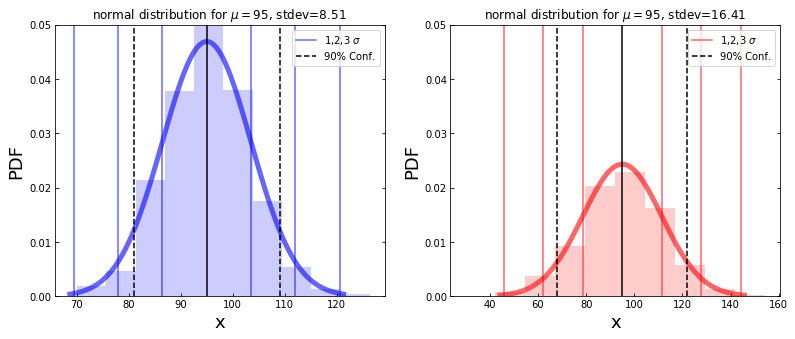

In [17]:
val    = 95
scales = [8.51141, 16.41487]
colors = ['blue', 'red']

fig, ax = plt.subplots(1, 2, figsize=(13,5))

for i,scl in enumerate(scales):
    x = np.linspace(norm.ppf(0.001, loc=val, scale=scl),
                    norm.ppf(0.999, loc=val, scale=scl), 100)

    ax[i].plot(x, norm.pdf(x, loc=val, scale=scl), color=colors[i], ls='-', lw=5, alpha=0.6)
    
    # GENERATE 1000 RANDOM VARIABLES OF THIS NORMAL DISTRIBUTION. 
    r = norm.rvs(size=1000, loc=val, scale=scl)
    ax[i].hist(r, density=True, histtype='stepfilled', color=colors[i], alpha=0.2)
    
    ax[i].axvline(val, 0, 1, color='black', linestyle='-') # val is mean of the distribution, (95)
    
    # 1,2,3 sigma quantiles. 
    pctls1 = norm.ppf([.50-(.6827/2.), .50+(.6827/2.), 
                       .50-(.9545/2.), .50+(.9545/2.), 
                       .50-(.9973/2.), .50+(.9973/2.)], loc=val, scale=scl)
    
    # 90% confidence level
    pctls2 = norm.ppf([.05, .95], loc=val, scale=scl)
    
    # LABELS FOR THESE 
    # If label is empty or starts with “_”, those artists will be ignored.
    labs1 =['']*(len(pctls1)-1); labs1
    labs1 = labs1 + ['1,2,3 $\sigma$']
    labs2 =['']*(len(pctls2)-1); labs2
    labs2 = labs2 + ['90% Conf.']
    
    for j,pctl in enumerate(pctls1):  # six iterations 
        ax[i].axvline(pctl, 0, 1, color=colors[i], linestyle='-', alpha=0.6, label=labs1[j])
    
    for j,pctl in enumerate(pctls2):  # two iterations
        ax[i].axvline(pctl, 0, 1, color='black', linestyle='--',  label=labs2[j])
        
    ax[i].set_ylim(0, 0.05)
    ax[i].legend(loc=1, frameon=True, numpoints=1)
    ax[i].set_xlabel('x', fontsize=18)
    ax[i].set_ylabel('PDF', fontsize=18)
    ax[i].set_title('normal distribution for $\mu=95$, stdev=%.2f'%scales[i])
    
plt.show()